![](t81.PNG)

___ EJERCICIO #1 ___


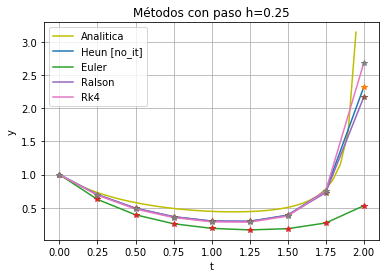

In [1]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show

from matplotlib.pyplot import figure

from Chira_modulo import *

import warnings
warnings.filterwarnings("ignore")

####################                    ####################
############################################################
####################   EJERCICIO 1      ####################
############################################################
####################                    ####################
print("___ EJERCICIO #1 ___")

#Condiciones: inicial y de rango [a,b]
yt0=1
a=0
b=2
h=0.25 #paso h=(b-a)/n
                              

#EDO del problema
def fdy(t,y):
    return -1.5*y + y*t**3

#funcion con la condicion inicial y(t=0)=1
def funcion1(t):
    return 1/(1 + 1.5*t - 0.25*t**4) 


#analiticamente
ts=linspace(0,2,40)
yfs=funcion1(ts)
plt.plot(ts,yfs,'y',label="Analitica")


###    METODO DE HEUN [no it]
tsH,ysH=met_heun_noit(a,b,yt0,fdy,h)
plt.plot(tsH,ysH,label="Heun [no_it]") 
plt.plot(tsH,ysH,'*') 


###    METODO DE EULER
tsE,ysE=met_euler(a,b,yt0,fdy,h)
plt.plot(tsE,ysE,label="Euler")
plt.plot(tsE,ysE,'*') 


###    METODO DE RALSON
tsR,ysR=met_ralson(a,b,yt0,fdy,h)
plt.plot(tsR,ysR,label="Ralson")
plt.plot(tsR,ysR,'*') 


###    METODO DE Rk4
tsRK4,ysRK4=met_RK4(a,b,yt0,fdy,h)
plt.plot(tsRK4,ysRK4,label="Rk4")
plt.plot(tsRK4,ysRK4,'*') 

plt.grid()
plt.legend()
plt.title("Métodos con paso h=" + str(h))
plt.ylabel("y")
plt.xlabel("t")
plt.show()





![](t82.PNG)

___ EJERCICIO #2 ___


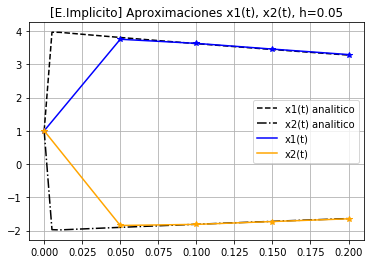

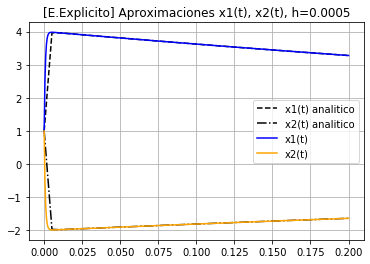

In [2]:

####################                    ####################
############################################################
####################   EJERCICIO 2      ####################
############################################################
####################                    ####################
print("___ EJERCICIO #2 ___")

#funciones para el problema

def coefs_dyidt(): #Esta func es especifica de cada problema(*)
    cyi=[(999,1999,0),(-1000,-2000,0)]
    return cyi
    
# (*) donde las ecuaciones tienen la forma:
# dy1/dt = c11y1 + c12y2 +c13
# dy2/dt = c21y1 + c22y2 +c23

def funcion2(t):
    x1=(3998*exp(-t) - 2999*exp(-1000*t))/999
    x2=(-2000*exp(-t)+2999*exp(-1000*t))/999
    return x1, x2

#analiticamente
ts2a=linspace(0,0.2,40)
yfs2a=funcion2(ts2a)
plt.plot(ts2a,yfs2a[0],'--k',label="x1(t) analitico")
plt.plot(ts2a,yfs2a[1],'-.k',label="x2(t) analitico")

###Euler Implicito
#condiciones iniciales 
yt0s=[1,1]
a2=0
b2=0.2
h2=0.05

ts2,ys2=met_euler_implicito_sist(a2,b2,yt0s,coefs_dyidt,h2)

#graficas:
plt.plot(ts2,ys2[0],'b',label="x1(t)")
plt.plot(ts2,ys2[0],'b*')
plt.plot(ts2,ys2[1],color='orange',label="x2(t)")
plt.plot(ts2,ys2[1],'*',color='orange')
plt.legend()
plt.title('[E.Implicito] Aproximaciones x1(t), x2(t), h='+str(h2))
plt.grid()
plt.show()

##Euler Explicito
#funcion del problema
def dxidt(t,ys):
    dx1dt= 999*ys[0] + 1999*ys[1]
    dx2dt= -1000*ys[0] - 2000*ys[1]
    return dx1dt, dx2dt
    

#analiticamente
plt.plot(ts2a,yfs2a[0],'--k',label="x1(t) analitico")
plt.plot(ts2a,yfs2a[1],'-.k',label="x2(t) analitico")    
    
h22=0.0005
texp, yexp=sist_met_euler_exp(a2,b2,yt0s,dxidt,h22) 
plt.plot(texp,yexp[0],'b',label="x1(t)")
# plt.plot(texp,yexp[0],'b*')
plt.plot(texp,yexp[1],color='orange',label="x2(t)")
# plt.plot(texp,yexp[1],'*',color='orange')
plt.legend()
plt.title('[E.Explicito] Aproximaciones x1(t), x2(t), h='+str(h22))
plt.grid()
plt.show()


![](t83.PNG)

___ EJERCICIO #3 ___


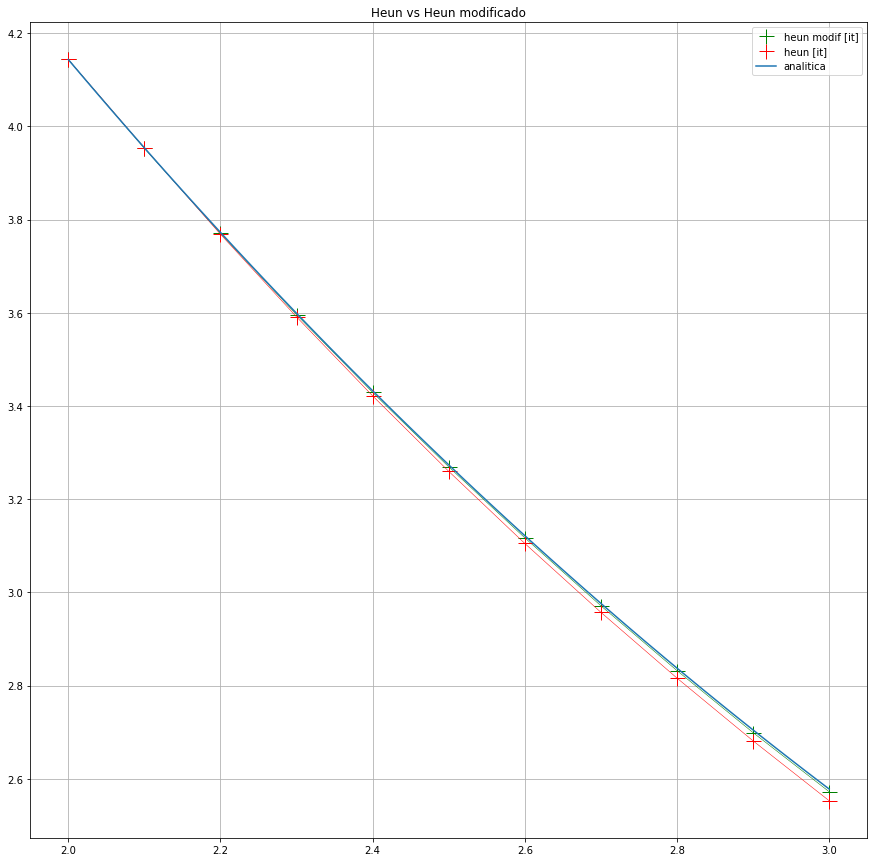

In [3]:

####################                    ####################
############################################################
####################   EJERCICIO 3      ####################
############################################################
####################                    ####################
print("___ EJERCICIO #3 ___")

yt03=[5.222138, 4.143883]
yt031=4.143883
h3=0.1
a3=2
b3=3
cvg_vl=0.001

def ej3_dydt(t,y):
    return -0.5*y + exp(-t)

def ej3_f(t):
    return -(2/exp(t)) + (12.00000074/exp(0.5*t))


f = plt.figure(figsize=(15,15))


# #graf heun modif con cvg
thmcv,yhmcv=heun_modificado_it(a3,b3,yt03,ej3_dydt,cvg_vl,h3)
plt.plot(thmcv,yhmcv,'+g',markersize=15,label="heun modif [it]")
plt.plot(thmcv,yhmcv,'g',linewidth=0.5)

# #graf heun con cvg
thcv,yhcv=met_heun_it(a3,b3,yt031,ej3_dydt,cvg_vl,h3)
plt.plot(thcv,yhcv,'+r',markersize=15,label="heun [it]")
plt.plot(thcv,yhcv,'r',linewidth=0.5)


#graf solucion analitica
t_ltk=linspace(a3,b3,100)
y_ltk=ej3_f(t_ltk)
plt.plot(t_ltk,y_ltk,label="analitica")#,linewidth=1


plt.legend()
plt.title('Heun vs Heun modificado')
# plt.yscale('log')
plt.grid()
plt.show()